In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from scipy.optimize import curve_fit
import scipy.stats as ss


In [64]:
def Process_Data(df):
    """
    Function to clean a data frame with required columns 
    """
    df = df.drop(['Country Name','Country Code','Series Code'],axis =1)
    df.set_index('Series Name', inplace=True)
    df= df.T
    df.index = df.index.str.split().str.get(0)
    df.columns.name = ''
    df = df.rename(columns=
        {"Gross capital formation (% of GDP)":
                                    "Gross capital formation",
         "Households and NPISHs Final consumption expenditure (constant 2015 US$)": 
                                    "Households Expenditure",
         "Imports of goods and services (% of GDP)":
                                    "Imports of Goods and Services",
         "Population ages 65 and above, total"
                                   :"Population above 65 years",
         "Unemployment, total (% of total labor force) (national estimate)"
                                   :"Unemployment",
         "Combustible renewables and waste (% of total energy)"
                                   :"Combustible Renewables",
         "Electricity production from oil sources (% of total)"
                                   :"Electricity oil sources"})
    df.index = df.index.astype(int)
    # Convert all the columns to integers, handling potential non-convertible values
    df = df.apply(lambda x: pd.to_numeric(x, errors='coerce').fillna(0).astype(float))
    return df
 

In [81]:
def plot_Line_Graph(*df):
    """
    Defining a function to create a Line plot 
    to identify the relation between Foreign Investments across countries
    """
    plt.figure(figsize=(7, 5))
    
    cmap = ['red','skyblue','orange','green']
    
    #plotting the Foreign Investments Data
    for i, df in enumerate(df):
        sns.lineplot( data = df['Imports of Goods and Services'], 
                     color = cmap[i],marker ='o',label = x[i],
                     )
        
    
    #set the titles, labels, limits and grid values
    plt.title('Imports of Goods and Services across countries')
    plt.xlabel('Years')
    plt.ylabel('Imports of Goods and Services')
    plt.grid()
    # Save the plot as Linegraph.png
    plt.savefig('Linegraph.png')
    # Show the plot
    plt.show()
    return


In [66]:
def Plot_Histogram(*df):
    """
    Defining a function to create a histogram 
    to understand the probability of Employment to Pop ratio
    for different countries across the years
    """
    plt.figure(figsize=(7, 5))
    cmap = ['red','skyblue','orange','green']
    
    # plotting an overlapped histogram to observe the frequency of the 
    # Employment ratio.
    for i, df in enumerate(df):
        sns.histplot(df['Unemployment'], kde=True, stat="density",
                     bins=10,linewidth=0, label=x[i],alpha=0.5,
                     color = cmap[i])
    
    #set the titles, legend, labels and grid 
    plt.title('Distribution of Unemployemnt ')
    plt.xlabel('Unemployment(%)')
    plt.ylabel('Probability')
    plt.grid(axis='y')
    plt.legend()
    # Save the plot as histogram.png
    plt.savefig('histogram.png')
    # Show the plot
    plt.show()
    return


In [67]:
def plot_heatmap_correlation(df):
    """
    Defining a function to create a Heatmap to plot
    correlation between different factors 
    """
    # creating an upper triangular data with 0's and 1's for masking
    mask = np.triu(np.ones_like(df.corr()))
    plt.figure(figsize=(7, 5))
    # plotting a heatmap
    sns.heatmap(df.corr(), annot=True, mask=mask,
                cmap='BuPu', linewidths=.5)
    
    #set the title
    plt.title('Correlation between various factors')
    # Save the plot as Heatmap.png
    plt.savefig('Heatmap.png')
    # Show the plot
    plt.show()
    return

In [82]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia


In [69]:
def Plot_Fitted_GDP_Expense(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    #Plot the data with different colors for clusters
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap,
                   marker='o', label='Data')

    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap,
               marker='x', s=100, label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('Combustible Renewables')
    ax.set_ylabel('Electricity oil sources')
    plt.show()
    return

In [83]:
def Plot_Elbow_Method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    #ax.scatter(best_n, wcss[best_n-min_k], marker='o', 
    #           color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

In [88]:
def Logistic_Fit(t, n0, g, t0):
    """
    Calculates the logistic function with scale factor n0 and growth rate g
    """
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

In [94]:
df_GDP = pd.read_csv(r"C:\Users\Asus\Downloads\P_Data_Extract_From_World_Development_Indicators (2) (1)\379626e2-b44a-48fd-a78d-95d54b38e1c8_Data.csv")


In [125]:
#splitting the data according to countries
df_Australia = df_GDP[df_GDP['Country Name'].isin(['Australia'])]
df_Ireland = df_GDP[df_GDP['Country Name'].isin(['Ireland'])]
df_Norway = df_GDP[df_GDP['Country Name'].isin(['Norway'])]
df_Denmark= df_GDP[df_GDP['Country Name'].isin(['Denmark'])]


In [126]:
#Processsing the Data
df_Australia = Process_Data(df_Australia)
df_Ireland = Process_Data(df_Ireland)
df_Norway = Process_Data(df_Norway)
df_Denmark = Process_Data(df_Denmark)

df_Denmark.head()

,Gross capital formation,Imports of Goods and Services,Households Expenditure,Population above 65 years,Unemployment,Broad money (% of GDP),Combustible Renewables,Electricity oil sources
1976,25.414161,32.769558,8.335792e+10,690694.0,5.3,43.530931,2.084373,53.405822
1977,24.406196,31.924945,8.501160e+10,704466.0,6.4,42.891558,2.037788,51.885424
1978,23.135277,29.634568,8.648149e+10,718611.0,7.3,40.988361,2.180757,44.480360
1979,23.118011,31.614885,8.737387e+10,730282.0,6.1,40.621097,2.564375,36.741893
1980,20.124353,32.953096,8.541888e+10,739026.0,7.0,41.906600,3.361875,18.004857


In [127]:
#list to store the coutries names
x = ['Australia','Ireland','Norway','Denmark']

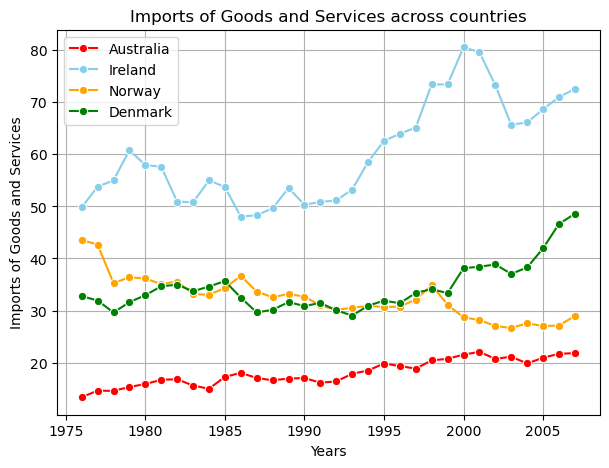

In [128]:
#plotting Line graph
plot_Line_Graph(df_Australia,df_Ireland,df_Norway,df_Denmark)

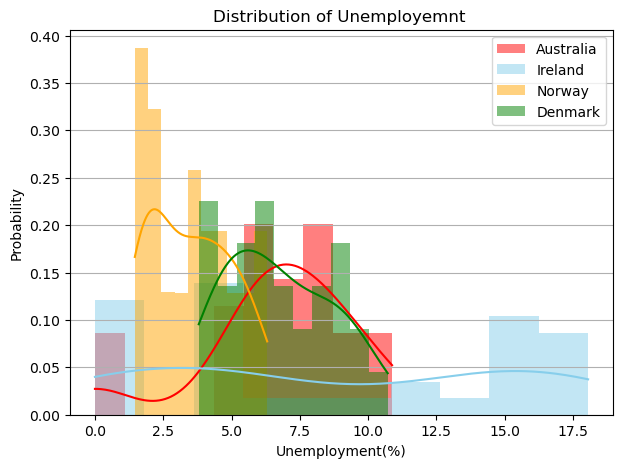

In [102]:
#plotting Histogram
Plot_Histogram(df_Australia,df_Ireland,df_Norway,df_Denmark)

In [149]:
#dataframe which includes all the countries data
df= pd.concat([df_Australia,df_Ireland,df_Norway,df_Denmark])

In [104]:
#Using describe function for mean, stanadrd deviation, min and max value.
print('Stats of the data', end='\n')
print(df.describe())

Stats of the data
       Gross capital formation  Imports of Goods and Services  \
count               128.000000                     128.000000   
mean                 24.371999                      36.264716   
std                   4.217576                      16.306529   
min                  15.469194                      13.362048   
25%                  21.522708                      25.502925   
50%                  24.284951                      32.714339   
75%                  27.363509                      48.095856   
max                  38.887614                      80.565098   

       Households Expenditure  Population above 65 years  Unemployment  \
count            1.280000e+02               1.280000e+02    128.000000   
mean             1.511515e+11               9.524081e+05      6.391734   
std              1.375391e+11               6.403773e+05      4.212768   
min              2.685317e+10               3.529620e+05      0.000000   
25%              6.710244e

In [130]:
#basic statistics of the data

print('Skewness of the data', end='\n')
print(df.skew() , end='\n\n')

print('Kurtosis of the data', end='\n')
print(df.kurtosis() , end='\n\n')

print('Correlation of the data', end='\n')
print(df.corr() , end='\n\n')

Skewness of the data

Gross capital formation          0.422304
Imports of Goods and Services    0.841546
Households Expenditure           1.627362
Population above 65 years        1.384059
Unemployment                     0.927025
Broad money (% of GDP)          -0.725382
Combustible Renewables          -0.299269
Electricity oil sources          2.443371
dtype: float64

Kurtosis of the data

Gross capital formation          0.760386
Imports of Goods and Services    0.036348
Households Expenditure           1.780506
Population above 65 years        0.693397
Unemployment                     0.816189
Broad money (% of GDP)          -0.767193
Combustible Renewables          -0.514675
Electricity oil sources          5.598490
dtype: float64

Correlation of the data
                               Gross capital formation  \
                                                         
Gross capital formation                       1.000000   
Imports of Goods and Services                -0.082824

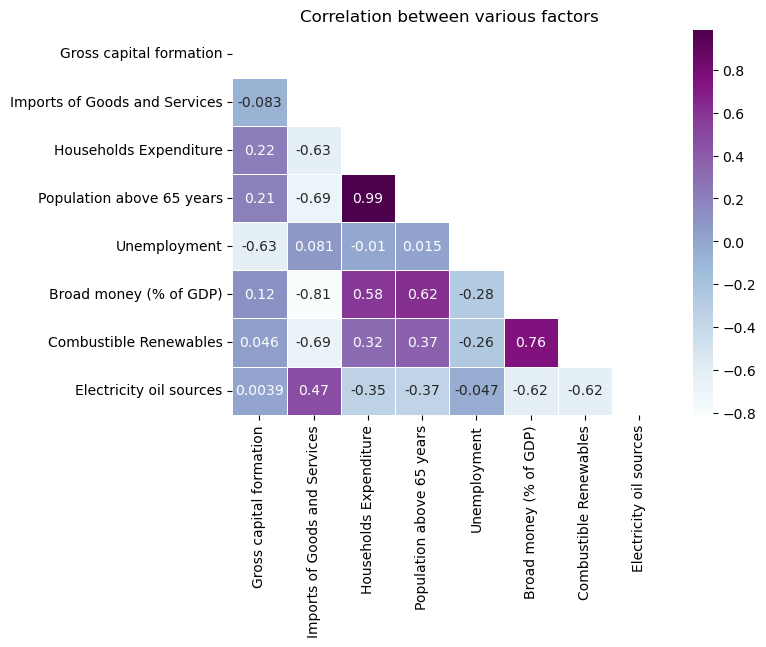

In [106]:
#Plotting Heatmap
plot_heatmap_correlation(df)

In [131]:
#Clustering the GDP and Expense data 
df_clust = df[['Combustible Renewables','Electricity oil sources']].copy()
scaler = RobustScaler()
norm = scaler.fit_transform(df_clust)


In [132]:
#craeting a list of colors
colours = plt.cm.Set1(np.linspace(0, 1, 5))
cmap = ListedColormap(colours)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

Best number of clusters =  2


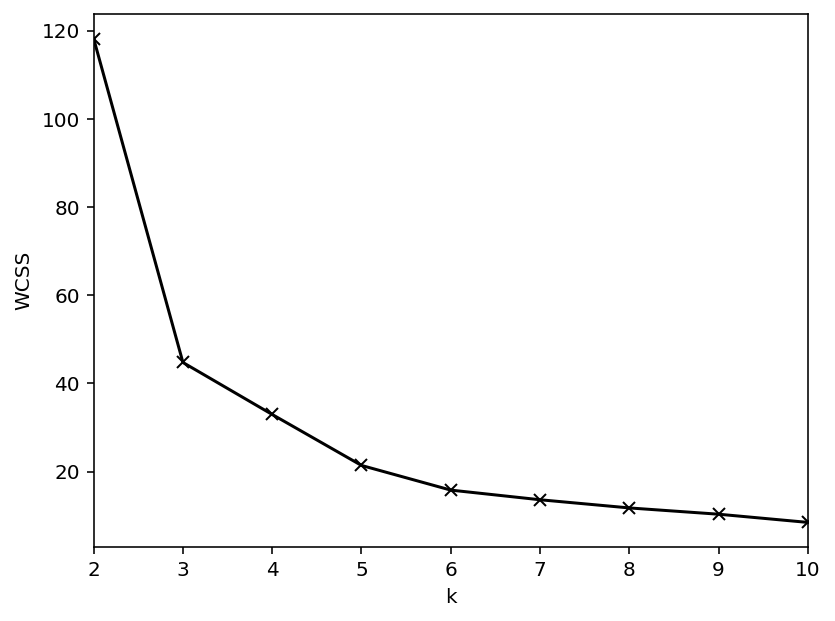

In [133]:
#finding the best number of CLusters using silhoutte method
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    #print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

#finding the best number of CLusters using elbow method
Plot_Elbow_Method(2, 10, wcss, best_n)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


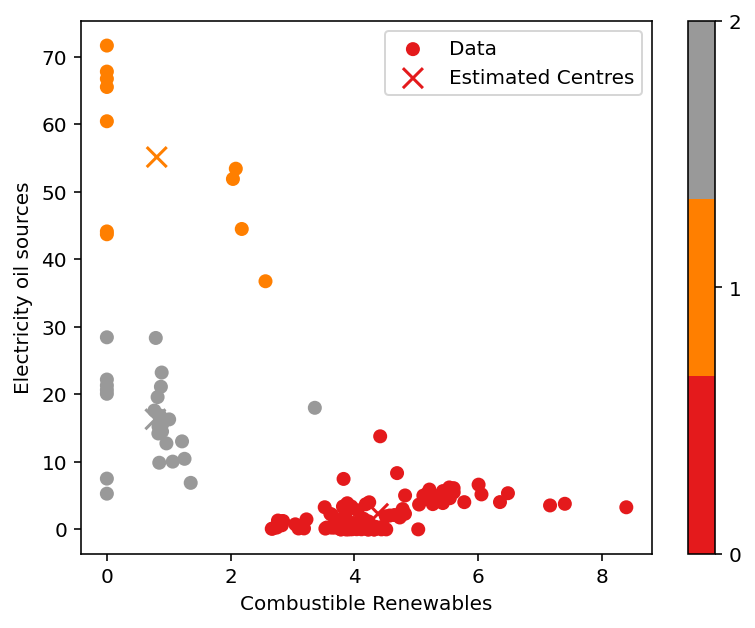

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


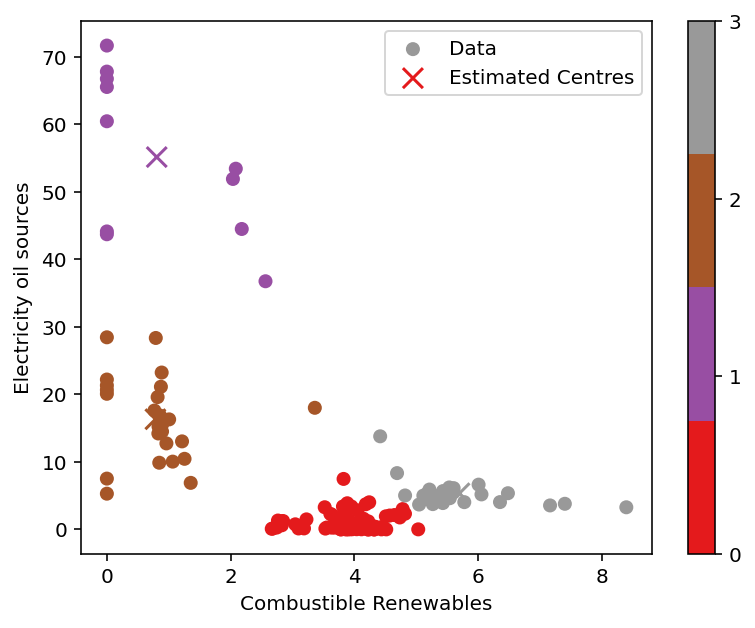

In [111]:
#For plotting data accurately normalising the data
inv_norm = scaler.inverse_transform(norm)  
for k in range(3, 5):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    Plot_Fitted_GDP_Expense(labels, inv_norm, xkmeans, ykmeans, cenlabels)
    

GDP in 2040: 3.73278e+06
GDP in 2040: 3.73278e+06 +/- 69546


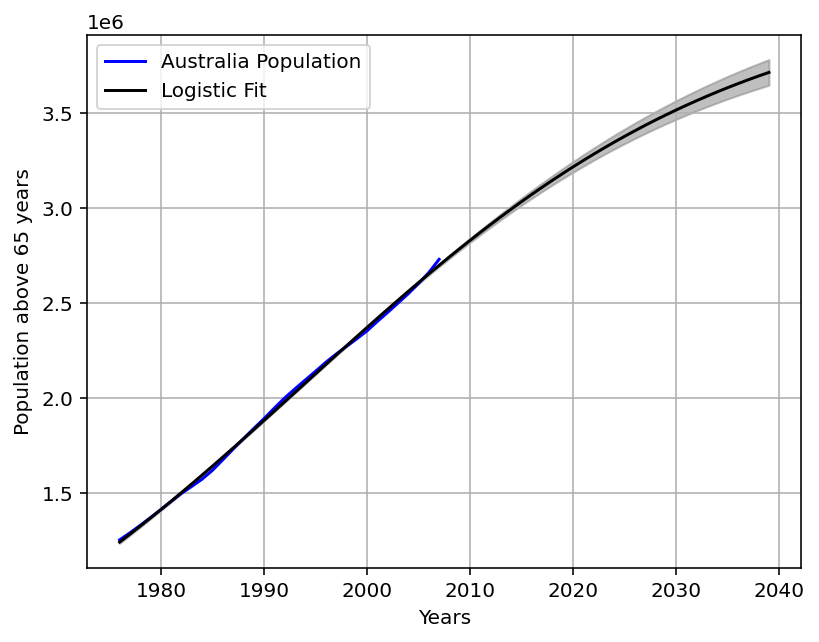

In [165]:

#craeting a new Dataframe with only Bulgaria GDP data for lopgistic fitting
df_Australia_fit = df_Australia[['Population above 65 years']]
df_Australia_fit.index = df_Australia_fit.index.astype(int)

#Extending the fitted line to 2050 to predict the GDP

numeric_index = (df_Australia_fit.index - 1995).values
p, cov = curve_fit(Logistic_Fit, numeric_index, df_Australia_fit['Population above 65 years'],
                  p0=(1.2e12, 0.03, 10))

#subtract the 2005 as we did when 'training'
gdp_2040 = Logistic_Fit(2040 - 1995, *p) 
 
print(f"GDP in 2040: {gdp_2040:g}")

# take 1000 normal random samples for each parameter
sample_params = ss.multivariate_normal.rvs(mean=p, cov=cov, size=1000)

# standard deviation of all possible parameter sampling
gdp_unc_2040 = np.std(Logistic_Fit(2040 - 1995, *sample_params.T)) 

print(f"GDP in 2040: {gdp_2040:g} +/- {gdp_unc_2040:g}")

fig, ax = plt.subplots(dpi=144)
# create array of values within data, and beyond
time_predictions = np.arange(1976, 2040, 1)
# determine predictions for each of those times
gdp_predictions = Logistic_Fit(time_predictions -1995, *p)
# determine uncertainty at each prediction
gdp_uncertainties = [np.std(Logistic_Fit(future_time - 1995, *sample_params.T)
                            ) for future_time in time_predictions]

#ploptting the data along with the logistic fit and the uncertainities
ax.plot(df_Australia_fit.index, df_Australia_fit['Population above 65 years'],
        'b-', label='Australia Population')
ax.plot(time_predictions, gdp_predictions, 'k-', label='Logistic Fit')
ax.fill_between(time_predictions, gdp_predictions - gdp_uncertainties,
                gdp_predictions + gdp_uncertainties, 
                color='gray', alpha=0.5)


#Set the labels, legend and grid'
#plt.yscale('log')
ax.set_xlabel('Years')
ax.set_ylabel('Population above 65 years')
ax.grid()
ax.legend()
#Show the plot
plt.show()
